In [1]:
#imports
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt

In [5]:
#paths
DATASET_ARCHIVE_PATH = "./recommender-systems/recommendation_system/dataset.zip"

In [6]:
#load data
df = pd.read_csv(DATASET_ARCHIVE_PATH, compression='zip')

In [8]:
df.columns

Index(['id', 'dateAdded', 'dateUpdated', 'address', 'categories',
       'primaryCategories', 'city', 'country', 'keys', 'latitude', 'longitude',
       'name', 'postalCode', 'province', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username', 'sourceURLs', 'websites'],
      dtype='object')

In [12]:
df['reviews.username'].unique()

array(['tatsurok2018', 'STEPHEN N', '15Deborah', ..., 'K261ANbrendah',
       'soccerrocks2016', 'tootallsmith'], dtype=object)

In [13]:
df['reviews.username']

0          tatsurok2018
1             STEPHEN N
2             15Deborah
3            Wilfredo M
4                 Luc D
             ...       
9995        Tiffany1017
9996            bobg187
9997      K261ANbrendah
9998    soccerrocks2016
9999       tootallsmith
Name: reviews.username, Length: 10000, dtype: object

In [14]:
df['reviews.username'].describe()

count       10000
unique       9222
top       David W
freq            7
Name: reviews.username, dtype: object

In [18]:
df['id'].describe()

count                    10000
unique                    1433
top       AVwcgshl_7pvs4fzv3ge
freq                       209
Name: id, dtype: object

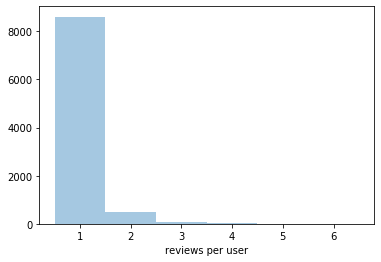

In [35]:
# most users only produce 1 review, so no user-based alignment
review_user_serie = df.groupby('reviews.username').apply(len)
review_user_serie.name = "reviews per user"
sns.distplot(review_user_serie, bins=[i+.5 for i in range(review_user_serie.max())], kde = False)

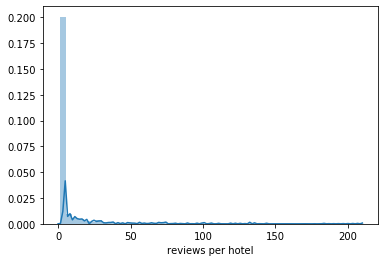

In [40]:
# most users only produce 1 review, so no user-based alignment
review_hotel_serie = df.groupby('id').apply(len)
review_hotel_serie.name = "reviews per hotel"
sns.distplot(review_hotel_serie)

In [41]:
review_hotel_serie.describe()

count    1433.000000
mean        6.978367
std        18.402854
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       209.000000
Name: reviews per hotel, dtype: float64

In [37]:
score_matrix = df.groupby('id')['reviews.rating']

In [39]:
score_matrix.describe()

,count,mean,std,min,25%,50%,75%,max
id,,,,,,,,
AV--lQdFRxPSIh2RmtbT,69.0,3.782609,1.174102,1.0,3.0,4.0,5.00,5.0
AV--lmxKIxWefVJwsReI,1.0,5.000000,NaN,5.0,5.0,5.0,5.00,5.0
AV--luVA3-Khe5l_ZMEJ,1.0,5.000000,NaN,5.0,5.0,5.0,5.00,5.0
AV-AN728a4HuVbedGQnJ,90.0,4.111111,0.917305,1.0,4.0,4.0,5.00,5.0
AV-Cilg2a4HuVbedGQqK,6.0,4.333333,0.516398,4.0,4.0,4.0,4.75,5.0
...,...,...,...,...,...,...,...,...
AWdgUTtXa4HuVbedaODu,1.0,4.000000,NaN,4.0,4.0,4.0,4.00,4.0
AWdlE0rK3-Khe5l_tDlq,36.0,3.861111,0.930523,1.0,3.0,4.0,4.25,5.0
AWfPeemaa4HuVbeddb2K,66.0,3.893939,1.068842,1.0,3.0,4.0,5.00,5.0


In [43]:
score_matrix.apply(lambda x: x.data)

D:\Logiciels\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Series.data is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


id
AV--lQdFRxPSIh2RmtbT    [5, 3, 5, 3, 4, 3, 5, 5, 4, 3, 4, 2, 3, 5, 5, ...
AV--lmxKIxWefVJwsReI                                                  [5]
AV--luVA3-Khe5l_ZMEJ                                                  [5]
AV-AN728a4HuVbedGQnJ    [4, 5, 4, 1, 4, 4, 3, 3, 3, 3, 4, 4, 5, 4, 3, ...
AV-Cilg2a4HuVbedGQqK                                   [4, 5, 5, 4, 4, 4]
                                              ...                        
AWdgUTtXa4HuVbedaODu                                                  [4]
AWdlE0rK3-Khe5l_tDlq    [3, 4, 4, 3, 5, 5, 4, 3, 4, 5, 1, 3, 4, 5, 4, ...
AWfPeemaa4HuVbeddb2K    [2, 4, 4, 5, 5, 2, 5, 4, 4, 4, 3, 4, 4, 3, 4, ...
AWfaJjQba4HuVbeddiSW                                               [5, 5]
AWfznEYmIxWefVJwAzb1    [2, 5, 5, 5, 4, 4, 4, 3, 5, 5, 5, 4, 4, 5, 4, ...
Name: reviews.rating, Length: 1433, dtype: object

In [44]:
score_matrix.describe()

,count,mean,std,min,25%,50%,75%,max
id,,,,,,,,
AV--lQdFRxPSIh2RmtbT,69.0,3.782609,1.174102,1.0,3.0,4.0,5.00,5.0
AV--lmxKIxWefVJwsReI,1.0,5.000000,NaN,5.0,5.0,5.0,5.00,5.0
AV--luVA3-Khe5l_ZMEJ,1.0,5.000000,NaN,5.0,5.0,5.0,5.00,5.0
AV-AN728a4HuVbedGQnJ,90.0,4.111111,0.917305,1.0,4.0,4.0,5.00,5.0
AV-Cilg2a4HuVbedGQqK,6.0,4.333333,0.516398,4.0,4.0,4.0,4.75,5.0
...,...,...,...,...,...,...,...,...
AWdgUTtXa4HuVbedaODu,1.0,4.000000,NaN,4.0,4.0,4.0,4.00,4.0
AWdlE0rK3-Khe5l_tDlq,36.0,3.861111,0.930523,1.0,3.0,4.0,4.25,5.0
AWfPeemaa4HuVbeddb2K,66.0,3.893939,1.068842,1.0,3.0,4.0,5.00,5.0


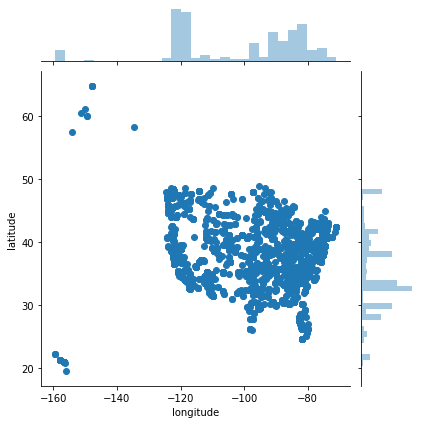

In [72]:
sns.jointplot(x="longitude", y="latitude", data=df)

In [49]:
df['category list'] = df['categories'].apply(lambda x: x.split(','))

In [53]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
df_categories = df[['id']].join(pd.DataFrame(mlb.fit_transform(df['category list']),
                          columns=mlb.classes_,
                          index=df.index))

df_categories

,id,,Bar,Beach,Casino,Conference Room,Hotel,NY,Resort,and Bar,...,Wedding Supplies and Services,Weekend Getaway Hotels,Wine Country Hotels,food catering,hotels & motels,places,restaurants,travel,travel & transport,wich Place
0,AWE2FvX5RxPSIh2RscTK,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,AVwcj_OhkufWRAb5wi9T,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AVwcj_OhkufWRAb5wi9T,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,AVwcj_OhkufWRAb5wi9T,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AVwcj_OhkufWRAb5wi9T,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,AVwdatg0ByjofQCxo5S5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,AVwdatg0ByjofQCxo5S5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,AVwdatg0ByjofQCxo5S5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,AV1thTgM3-Khe5l_OvT5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df_categories.columns

Index(['id', '', ' Bar', ' Beach', ' Casino', ' Conference Room', ' Hotel',
       ' NY', ' Resort', ' and Bar',
       ...
       'Wedding Supplies and Services', 'Weekend Getaway Hotels',
       'Wine Country Hotels', 'food catering', 'hotels & motels', 'places',
       'restaurants', 'travel', 'travel & transport', 'wich Place'],
      dtype='object', length=255)

In [55]:
# each id has 1 and only 1 primaryCategories
df['primaryCategories'].describe()

count                             10000
unique                                4
top       Accommodation & Food Services
freq                               9991
Name: primaryCategories, dtype: object

In [58]:
df.groupby('id')['primaryCategories'].nunique().describe()

count    1433.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: primaryCategories, dtype: float64

In [63]:
cols = ['id', 'dateAdded', 'dateUpdated', 'address', 'categories',
       'primaryCategories', 'city', 'country', 'keys', 'latitude', 'longitude',
       'name', 'postalCode', 'province', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username', 'sourceURLs', 'websites']

In [64]:
df[cols[:5]].describe(include='all')

,id,dateAdded,dateUpdated,address,categories
count,10000,10000,10000,10000,10000
unique,1433,1341,1397,1432,631
top,AVwcgshl_7pvs4fzv3ge,2015-07-09T04:25:41Z,2019-02-04T09:42:52Z,201 5th Ave N,"Hotels Motels,Hotel"
freq,209,209,209,209,1554


In [65]:
df[cols[5:10]].describe(include='all')

,primaryCategories,city,country,keys,latitude
count,10000,10000,10000,10000,10000.000000
unique,4,842,1,1433,NaN
top,Accommodation & Food Services,San Diego,US,us/wa/seattle/2015thaven/-1608096820,NaN
freq,9991,1189,10000,209,NaN
mean,NaN,NaN,NaN,NaN,35.048897
std,NaN,NaN,NaN,NaN,6.390993
min,NaN,NaN,NaN,NaN,19.438604
25%,NaN,NaN,NaN,NaN,29.957700
50%,NaN,NaN,NaN,NaN,33.804844
75%,NaN,NaN,NaN,NaN,39.048210


In [66]:
df[cols[10:15]].describe(include='all')

,longitude,name,postalCode,province,reviews.date
count,10000.000000,10000,10000,10000,10000
unique,NaN,1311,1149,46,3370
top,NaN,Hyatt House Seattle/Downtown,96815,CA,2016-05-09T00:00:00Z
freq,NaN,209,305,2647,17
mean,-101.619599,NaN,NaN,NaN,NaN
std,20.158379,NaN,NaN,NaN,NaN
min,-159.480300,NaN,NaN,NaN,NaN
25%,-117.888954,NaN,NaN,NaN,NaN
50%,-95.997600,NaN,NaN,NaN,NaN
75%,-84.371578,NaN,NaN,NaN,NaN


In [67]:
df[cols[15:20]].describe(include='all')

,reviews.dateAdded,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text
count,0.0,10000,10000.000000,10000,10000
unique,NaN,701,NaN,8228,9770
top,NaN,2018-12-15T00:00:00Z,NaN,https://www.tripadvisor.com/Hotel_Review-g5489...,MoreMore
freq,NaN,1067,NaN,6,18
mean,NaN,NaN,4.084100,NaN,NaN
std,NaN,NaN,1.152371,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN
50%,NaN,NaN,4.000000,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN


In [68]:
df[cols[20:]].describe(include='all')

,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
count,9999,10000,9998,10000,10000,10000
unique,8470,3101,244,9222,1433,1327
top,Great location,New York City,California,David W,https://www.tripadvisor.com/Hotel_Review-g6087...,http://seattledowntown.house.hyatt.com/en/hote...
freq,49,171,902,7,209,209


In [69]:
df['reviews.dateAdded']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
9995   NaN
9996   NaN
9997   NaN
9998   NaN
9999   NaN
Name: reviews.dateAdded, Length: 10000, dtype: float64

In [ ]:
# all are from US

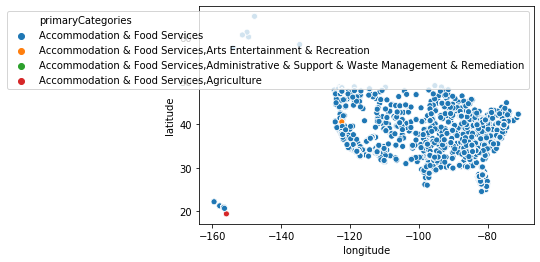

In [73]:
sns.scatterplot(x="longitude", y="latitude", data=df, hue='primaryCategories')

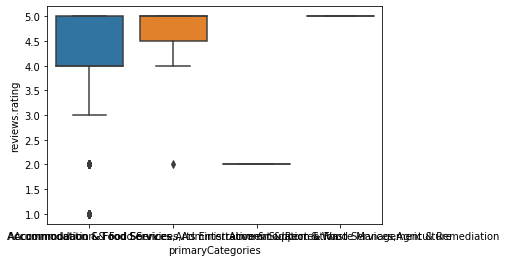

In [78]:
sns.boxplot(x='primaryCategories', y="reviews.rating", data=df)

In [80]:
df['primaryCategories'].unique()

array(['Accommodation & Food Services',
       'Accommodation & Food Services,Arts Entertainment & Recreation',
       'Accommodation & Food Services,Administrative & Support & Waste Management & Remediation',
       'Accommodation & Food Services,Agriculture'], dtype=object)

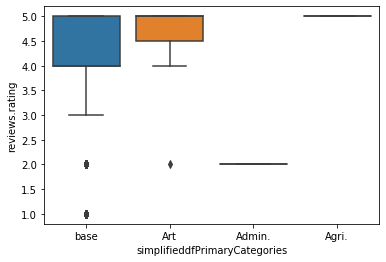

In [82]:
df['simplifieddfPrimaryCategories'] = df['primaryCategories'].apply(lambda x: {
    'Accommodation & Food Services': 'base',
    'Accommodation & Food Services,Arts Entertainment & Recreation': 'Art',
    'Accommodation & Food Services,Administrative & Support & Waste Management & Remediation': 'Admin.',
    'Accommodation & Food Services,Agriculture': 'Agri.'
}[x])
sns.boxplot(x='simplifieddfPrimaryCategories', y="reviews.rating", data=df)

In [84]:
df.groupby('id')[['id', 'simplifieddfPrimaryCategories']].first().groupby('simplifieddfPrimaryCategories').apply(len)

simplifieddfPrimaryCategories
Admin.       1
Agri.        1
Art          2
base      1429
dtype: int64